# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

#  Applying Reinforcement Learning on Price Data
You have already applied the RL model to a synthetic time series. Now it's time to apply that model on actual price data.

In this notebook, you will learn how to run the RL model on price and see the reinforcement learning strategy performance.
To do this, you need to follow these steps:

1. [Import modules](#Import_modules)
1. [Read price data](#Read_price_data)
1. [Run the RL model on the price data](#RL_run)
1. [Analyse strategy performance](#analyse)
1. [Result analysis](#results)

<a id='Import_modules'></a> 
## Import modules

In [1]:
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

import os
import sys
sys.path.append("..")

# To suppress GPU related warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Import Quantra RL libraries
from data_modules.quantra_reinforcement_learning import run
from data_modules.quantra_reinforcement_learning import reward_exponential_pnl
from data_modules.quantra_reinforcement_learning import trade_analytics

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

<a id='Read_price_data'></a>
## Read price data

In [2]:
# Price data is stored in data_modules
path = os.path.join('..','data_modules','PriceData5m.bz2')

# Read the price data
bars5m = pd.read_pickle(path)

# Display the last 5 entries of price data
bars5m.tail()

,open,high,low,close,volume
Time,,,,,
2020-08-31 15:40:00-04:00,350.44,350.750,350.433,350.692,658254.0
2020-08-31 15:45:00-04:00,350.71,350.733,350.330,350.680,842439.0
2020-08-31 15:50:00-04:00,350.69,351.270,350.640,351.210,1640390.0
2020-08-31 15:55:00-04:00,351.20,351.300,350.565,350.580,1890384.0
2020-08-31 16:00:00-04:00,350.59,350.730,349.770,349.770,3910688.0


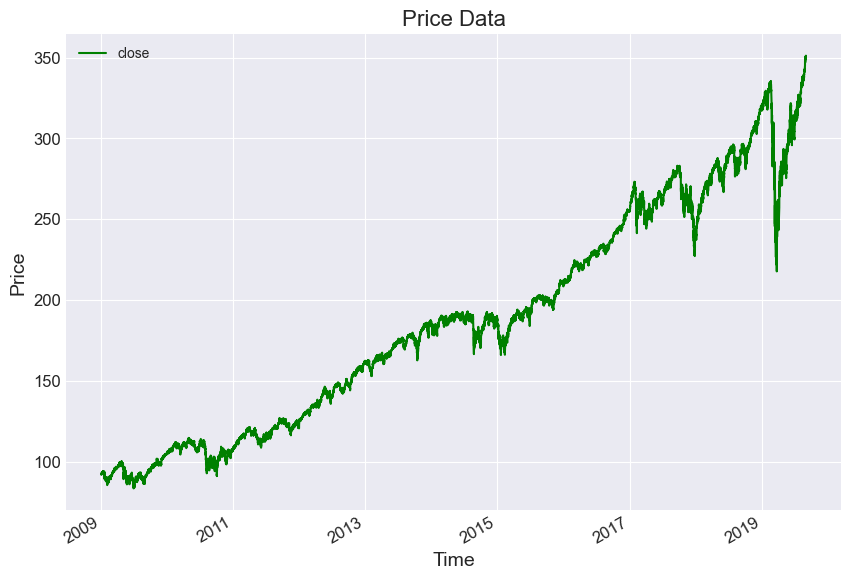

In [3]:
# Define the figure size for the price data
bars5m['close'].plot(figsize=(10, 7), color='g')

# Add legend to the axis
plt.legend()

# Add labels
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Price Data', fontsize=16)
    
# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

<a id='RL_run'></a>
## Run the RL model on the price data

In [7]:
"""
For running the RL model on the price data, you need to 
set the configuration parameters.
These configuration parameters are hyperparameters for the 
RL model and the ANN used in it.
"""
rl_config = {
    
             'LEARNING_RATE': 0.01,
             'LOSS_FUNCTION': 'mse',
             'ACTIVATION_FUN': 'relu',
             'NUM_ACTIONS': 3,
             'HIDDEN_MULT': 2,
             'DISCOUNT_RATE': 0.9,
             'LKBK': 30,
             'BATCH_SIZE': 1,
             'MAX_MEM': 600,
             'EPSILON': 0.0001,
             'EPS_MIN': 0.001,
             'START_IDX': 5000,
             'WEIGHTS_FILE': '../data_modules/indicator_model_price_data.h5',
             'TRADE_FILE': '../data_modules/trade_logs_price_data.bz2',
             'REPLAY_FILE': '../data_modules/memory_price_data.bz2',
             'RF': reward_exponential_pnl,
             'TEST_MODE': True,
             'PRELOAD': False,
             'UPDATE_QR': True
}

In [8]:
"""
Run the RL model on the price data
Note: To run in a local machine, please change the `TEST_MODE` to 
`False` in `rl_config`
"""
run(bars5m, rl_config)

Trade 001 | pos -1 | len 3 | approx cum ret 0.06% | trade ret 0.06% | eps 1.0010 | 2010-04-07 10:40:00-04:00 | 5005
Trade 002 | pos -1 | len 25 | approx cum ret 0.11% | trade ret 0.05% | eps 0.0635 | 2010-04-07 12:50:00-04:00 | 5031
Trade 003 | pos -1 | len 56 | approx cum ret 0.68% | trade ret 0.57% | eps 0.0133 | 2010-04-08 11:05:00-04:00 | 5088
Trade 004 | pos -1 | len 411 | approx cum ret -1.84% | trade ret -2.52% | eps 0.0049 | 2010-04-15 12:55:00-04:00 | 5500


KeyboardInterrupt: 

<a id='analyse'></a>
## Analyse strategy performance for the full dataset

Now you will analyse the strategy performance by plotting the returns and drawdown and by calculating a few performance metrics.

You can use the `trade_analytics` function from `quantra_reinforcement_learning` module to perform the analysis

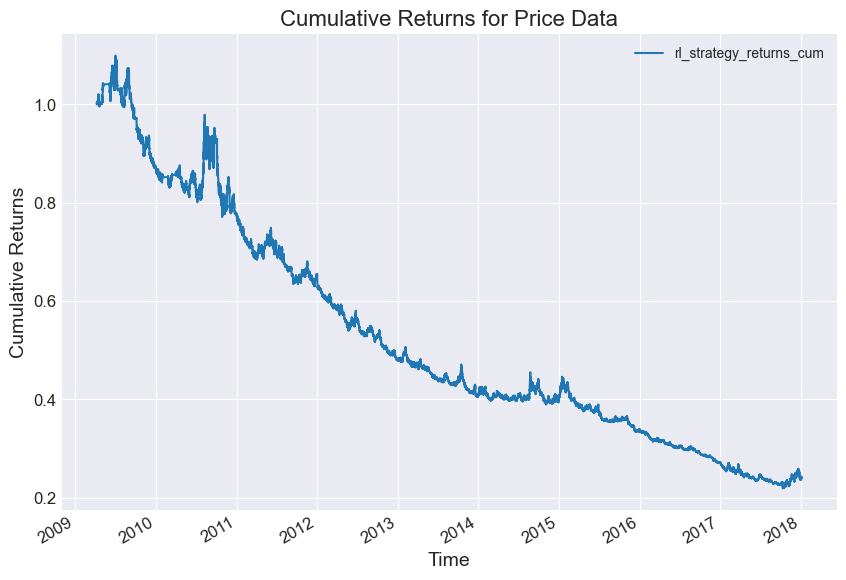

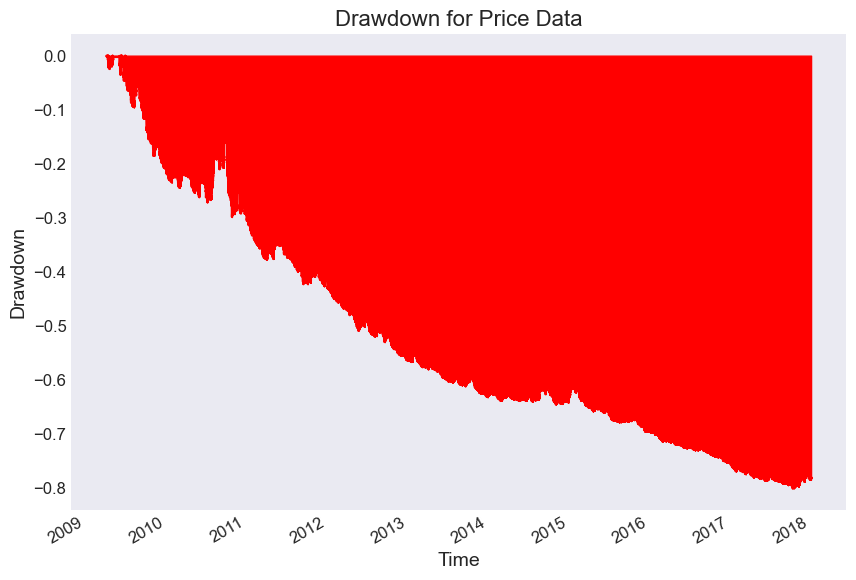

The final portfolio return is -75.75%
The maximum drawdown is -80.05%
The Sharpe ratio is -1.12


In [9]:
# Call the trade_analytics function
trade_analytics_df = trade_analytics(rl_config['TRADE_FILE'], bars5m, "Price Data")

<a id='results'></a>
## Result analysis

The RL model performs fairly well on the actual price data. It took some time to learn the pattern, and after the year 2012, it has given consistent returns.

Note that the price dips a lot in 2019 and in 2020(corona effect), but the RL model handles it well.

In 2019 it manages to keep the returns fairly flat in a crashing market.

In 2020, the returns drawdown due to the price crash, but the model makes up for this drawdown remarkably well in a short timeframe.

## Tweak the code
You can tweak the code in the following ways:

1. Use different data sets: backtest and try out the model on different stock data
1. Change the settings of the configuration parameters to see how the RL model performs on changing these settings. A few setting you may try changing:
    1. learning rate (`LEARNING_RATE`)
    1. lookback period (`LKBK`)
    1. batch size (`BATCH_SIZE`)
    1. maximum memory buffer (`MAX_MEM`)
    1. the epsilon (`EPSILON` or `EPS_MIN`) values 

In the upcoming units, you will learn how to automate your trades and do paper/live trades.
<br><br>